In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

model.save('hand_written.h5')

model = tf.keras.models.load_model('hand_written.h5')

loss,accuracy = model.evaluate(x_test,y_test)
print(f'loss : {loss}')
print(f'accuracy : {accuracy}')

C:\Users\kalya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8660 - loss: 0.4677
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9675 - loss: 0.1107
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9790 - loss: 0.0692
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9837 - loss: 0.0506
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0383
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9909 - loss: 0.0271
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9929 - loss: 0.0214
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9941 - loss: 0.0177
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9955 - loss: 0.0140
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9962 - loss: 0.0113
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9969 - loss: 0.0095
Epoch 12/20
1875/1875 ━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1899
loss : 0.16634920239448547
accuracy : 0.9740999937057495


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
this is the 5


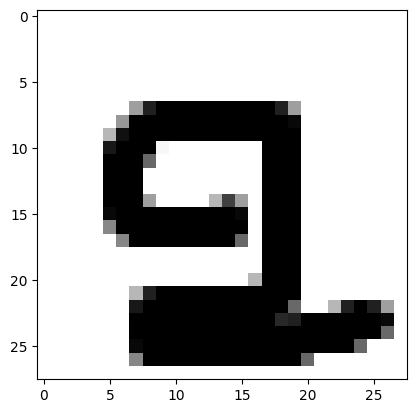

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
this is the 5


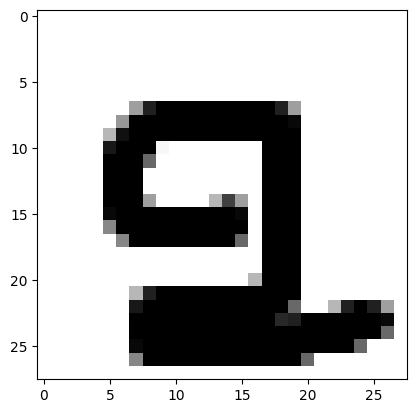

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
this is the 9


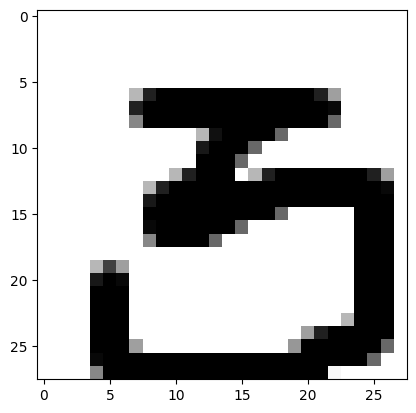

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
this is the 9


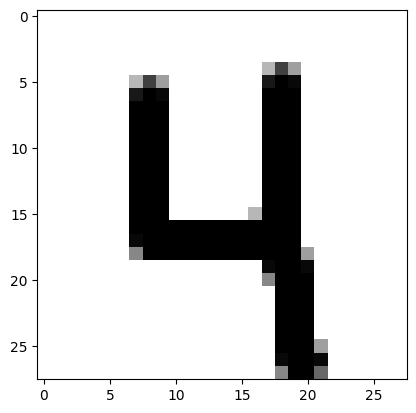

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
this is the 5


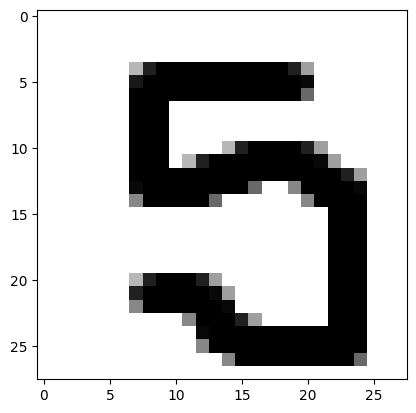

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
this is the 6


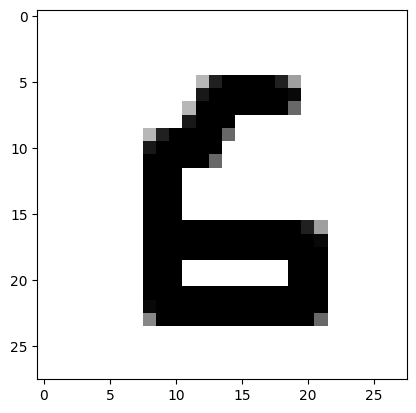

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
this is the 7


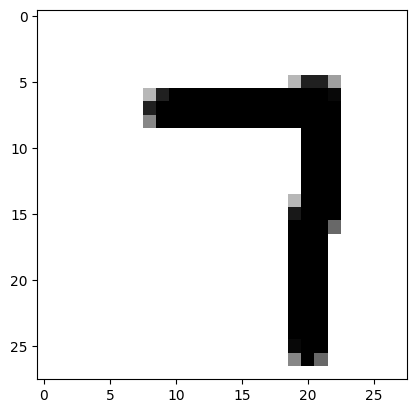

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
this is the 3


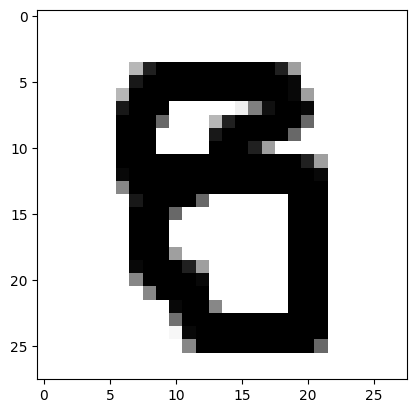

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
this is the 6


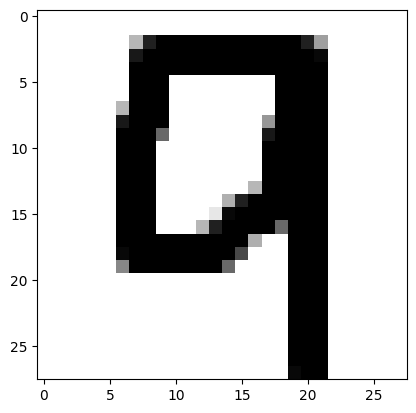

In [2]:
image_number =1
while os.path.isfile(f"./images/{image_number}.png"):
    try:
        img = cv2.imread(f"./images/{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"this is the {np.argmax(prediction)}")

        plt.imshow(img[0],cmap = plt.cm.binary)
        plt.show()
    except:
        print("ERROR!")
    finally:
        image_number+=1